# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score 

import warnings
warnings.filterwarnings("ignore")
sns.set() 
star_data = pd.read_csv('nasa.csv')

star_data_dropped_1 = star_data.drop(["Neo Reference ID","Name","Est Dia in KM(min)","Est Dia in KM(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Close Approach Date","Relative Velocity km per hr","Orbit ID","Orbit Determination Date","Miles per hour","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Epoch Date Close Approach"],axis=1)
star_data_dropped2 = star_data_dropped_1.drop(columns=['Orbiting Body', 'Equinox'])
star_data_dropped3 = star_data_dropped2.drop(columns=['Epoch Osculation'], axis=1)
star_data_dropped4 = star_data_dropped3.drop(columns=['Est Dia in M(min)', 'Orbital Period'], axis=1)


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color = 'green', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'purple', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Can we predict the size of asteroid using its other measurements through linear regression?

## Linear Regression without skewness correction

In [2]:
X = star_data_dropped4[star_data_dropped4.columns.difference(['Hazardous', 'Est Dia in M(max)'])]
X.head()

,Absolute Magnitude,Aphelion Dist,Asc Node Longitude,Eccentricity,Inclination,Jupiter Tisserand Invariant,Mean Anomaly,Mean Motion,Minimum Orbit Intersection,Miss Dist.(kilometers),Orbit Uncertainity,Perihelion Arg,Perihelion Distance,Perihelion Time,Relative Velocity km per sec,Semi Major Axis
0,21.6,2.005764,314.373913,0.425549,6.025981,4.634,264.837533,0.590551,0.025282,62753692.0,5,57.257470,0.808259,2.458162e+06,6.115834,1.407011
1,21.3,1.497352,136.717242,0.351674,28.412996,5.457,173.741112,0.845330,0.186935,57298148.0,3,313.091975,0.718200,2.457795e+06,18.113985,1.107776
2,20.3,1.966857,259.475979,0.348248,4.237961,4.557,292.893654,0.559371,0.043058,7622911.5,0,248.415038,0.950791,2.458120e+06,7.590711,1.458824
3,27.4,1.527904,57.173266,0.216578,7.905894,5.093,68.741007,0.700277,0.005512,42683616.0,6,18.707701,0.983902,2.457902e+06,11.173874,1.255903
4,21.6,1.483543,84.629307,0.210448,16.793382,5.154,135.142133,0.726395,0.034798,61010824.0,1,158.263596,0.967687,2.457814e+06,9.840831,1.225615


In [3]:
y = star_data_dropped4['Est Dia in M(max)']
y.head()

0    284.472297
1    326.617897
2    517.654482
3     19.680675
4    284.472297
Name: Est Dia in M(max), dtype: float64

In [4]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [5]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 5518.869265625607
Coefficients: 
 [-2.03190333e+02 -1.09105666e+02  2.56995445e-01 -9.46602526e+02
 -1.07114285e+01 -1.43523216e+03 -1.67692414e-02  4.49309533e+03
 -3.21863314e+02 -3.40894270e-07  1.64876777e+01  3.22119943e-02
 -1.66554130e+02  1.78148549e-03  7.31508837e-01 -1.37829886e+02]


In [6]:
y_pred = regr.predict(X_test)

In [7]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred)}')
print(f'Regression score is {regr.score(X_train, y_train)}')
print(f'Mean squared error: {metrics.mean_squared_error(y_test, y_pred)} ')
print(f'Root Mean Square Error (RMSE) : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')


Coefficient of determination: 0.5613097697277392
Regression score is 0.3605252710831198
Mean squared error: 198986.04990309343 
Root Mean Square Error (RMSE) : 446.07852436885304


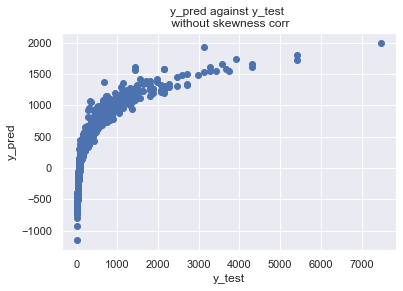

In [8]:
plt.scatter(y_test, y_pred)
plt.title('y_pred against y_test \n without skewness corr')
plt.xlabel('y_test')
plt.ylabel('y_pred')
#plt.xlim(0,10000)
#plt.ylim(0,10000)

plt.show()

In [9]:
coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Absolute Magnitude,-2.031903e+02
Aphelion Dist,-1.091057e+02
Asc Node Longitude,2.569954e-01
Eccentricity,-9.466025e+02
Inclination,-1.071143e+01
Jupiter Tisserand Invariant,-1.435232e+03
Mean Anomaly,-1.676924e-02
Mean Motion,4.493095e+03
Minimum Orbit Intersection,-3.218633e+02
Miss Dist.(kilometers),-3.408943e-07


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, scoring = 'r2', cv=10)
scores

array([0.51341316, 0.15908179, 0.54967603, 0.52189167, 0.61483207,
       0.62513649, 0.45294781, 0.45680873, 0.58197126, 0.60373121])

In [11]:
print(f'Cross validated mean score: {np.mean(scores)}')

Cross validated mean score: 0.5079490223887712


## Linear Regression with skewness correction

In [12]:
star_data_dropped4['Est Dia in M(max)'] = np.power((star_data_dropped4['Est Dia in M(max)']), 1/3)
star_data_dropped4['Minimum Orbit Intersection'] = np.power((star_data_dropped4['Minimum Orbit Intersection']), 1/3)

Intercept: 
 30.876187297416315
Coefficients: 
 [-9.45811038e-01 -1.82149628e-01  3.27555919e-04 -1.01265585e+00
 -6.94105028e-03 -2.31905376e+00  6.90911794e-05  7.23331369e+00
 -9.81381953e-01  1.57221394e-09 -1.78823795e-02 -3.82327782e-05
 -1.70533236e-01  1.89839513e-06 -2.79376776e-03 -1.76341405e-01]

 

Coefficient of determination: 0.9358134447079115
Regression score is 0.930370827392485
Mean squared error: 0.5283161495570761 
Root Mean Square Error (RMSE) : 0.7268535956828418


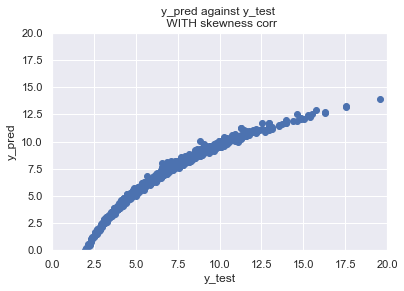



Cross Val Scores:
[0.93632162 0.87895413 0.93802057 0.92769821 0.94298542 0.94841445
 0.92001804 0.93435287 0.94497852 0.93986201]
Cross validated mean score: 0.931160584600051


In [13]:
X = star_data_dropped4[star_data_dropped4.columns.difference(['Hazardous', 'Est Dia in M(max)'])]
X.head()

y = star_data_dropped4['Est Dia in M(max)']
y.head()

from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

y_pred = regr.predict(X_test)

import sklearn.metrics as metrics

print('\n \n')
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred)}')
print(f'Regression score is {regr.score(X_train, y_train)}')
print(f'Mean squared error: {metrics.mean_squared_error(y_test, y_pred)} ')
print(f'Root Mean Square Error (RMSE) : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')


plt.scatter(y_test, y_pred)
plt.title('y_pred against y_test \n WITH skewness corr')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff_df

from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, scoring = 'r2', cv=10)
print('\n')
print('Cross Val Scores:')
print(scores)

print(f'Cross validated mean score: {np.mean(scores)}')
